___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Gradient Boosting and GridSearch


## The Data


<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Prep

In [6]:
X = df.drop('class',axis=1)

In [7]:
y = df['class']

In [8]:
X = pd.get_dummies(X,drop_first=True)

In [7]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## Train Test Split 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Gradient Boosting and Grid Search with CV

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {"n_estimators":[40,100,120],'max_depth':[1,2,3,4,5,6],'learning_rate':[0.05,0.1,0.05]}

In [24]:
gb_model = GradientBoostingClassifier()

In [25]:
grid = GridSearchCV(gb_model,param_grid)

### Fit to Training Data with CV Search

In [26]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.05],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [40, 100, 120]})

In [27]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

## Performance 

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [30]:
predictions = grid.predict(X_test)

In [21]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [28]:
grid.best_estimator_.feature_importances_

array([6.32283203e-04, 2.83170792e-16, 7.53419983e-19, 0.00000000e+00,
       5.10717525e-16, 1.66260890e-03, 2.08833803e-16, 1.69300367e-04,
       0.00000000e+00, 0.00000000e+00, 2.63198237e-16, 5.45852389e-17,
       2.72307213e-17, 0.00000000e+00, 0.00000000e+00, 4.18546865e-16,
       0.00000000e+00, 6.65876749e-02, 0.00000000e+00, 1.70751977e-02,
       4.60936317e-03, 1.04734744e-08, 6.23008069e-01, 1.82349720e-02,
       0.00000000e+00, 0.00000000e+00, 2.28124494e-08, 4.45729733e-03,
       1.57720294e-03, 0.00000000e+00, 1.72443907e-16, 0.00000000e+00,
       0.00000000e+00, 2.20854688e-16, 0.00000000e+00, 1.77497079e-16,
       3.11120613e-16, 0.00000000e+00, 1.68062729e-15, 0.00000000e+00,
       0.00000000e+00, 1.30108040e-03, 1.14329250e-01, 1.92725587e-02,
       1.88274462e-02, 1.19344474e-03, 0.00000000e+00, 6.43828368e-10,
       0.00000000e+00, 0.00000000e+00, 4.81488035e-02, 1.32167499e-03,
       0.00000000e+00, 0.00000000e+00, 3.69700466e-04, 5.34136596e-08,
      

In [34]:
feat_import = grid.best_estimator_.feature_importances_

In [35]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [36]:
imp_feats #which features are giving a lot of data based off that gini impurity value 

,Importance
cap-shape_c,6.322832e-04
cap-shape_f,2.831708e-16
cap-shape_k,7.534200e-19
cap-shape_s,0.000000e+00
cap-shape_x,5.107175e-16
...,...
habitat_l,2.845440e-06
habitat_m,1.407034e-16
habitat_p,0.000000e+00
habitat_u,1.169473e-17


In [37]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.623008
stalk-root_c,0.114329
bruises_t,0.066588
stalk-surface-below-ring_y,0.048149
spore-print-color_r,0.029901
...,...
stalk-color-below-ring_e,0.000000
stalk-color-below-ring_g,0.000000
stalk-color-below-ring_p,0.000000
stalk-color-below-ring_y,0.000000


In [28]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.06463,0.0,0.0,1.822210e-16,0.000801,0.614744


In [39]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [42]:
imp_feats=imp_feats.sort_values('Importance')

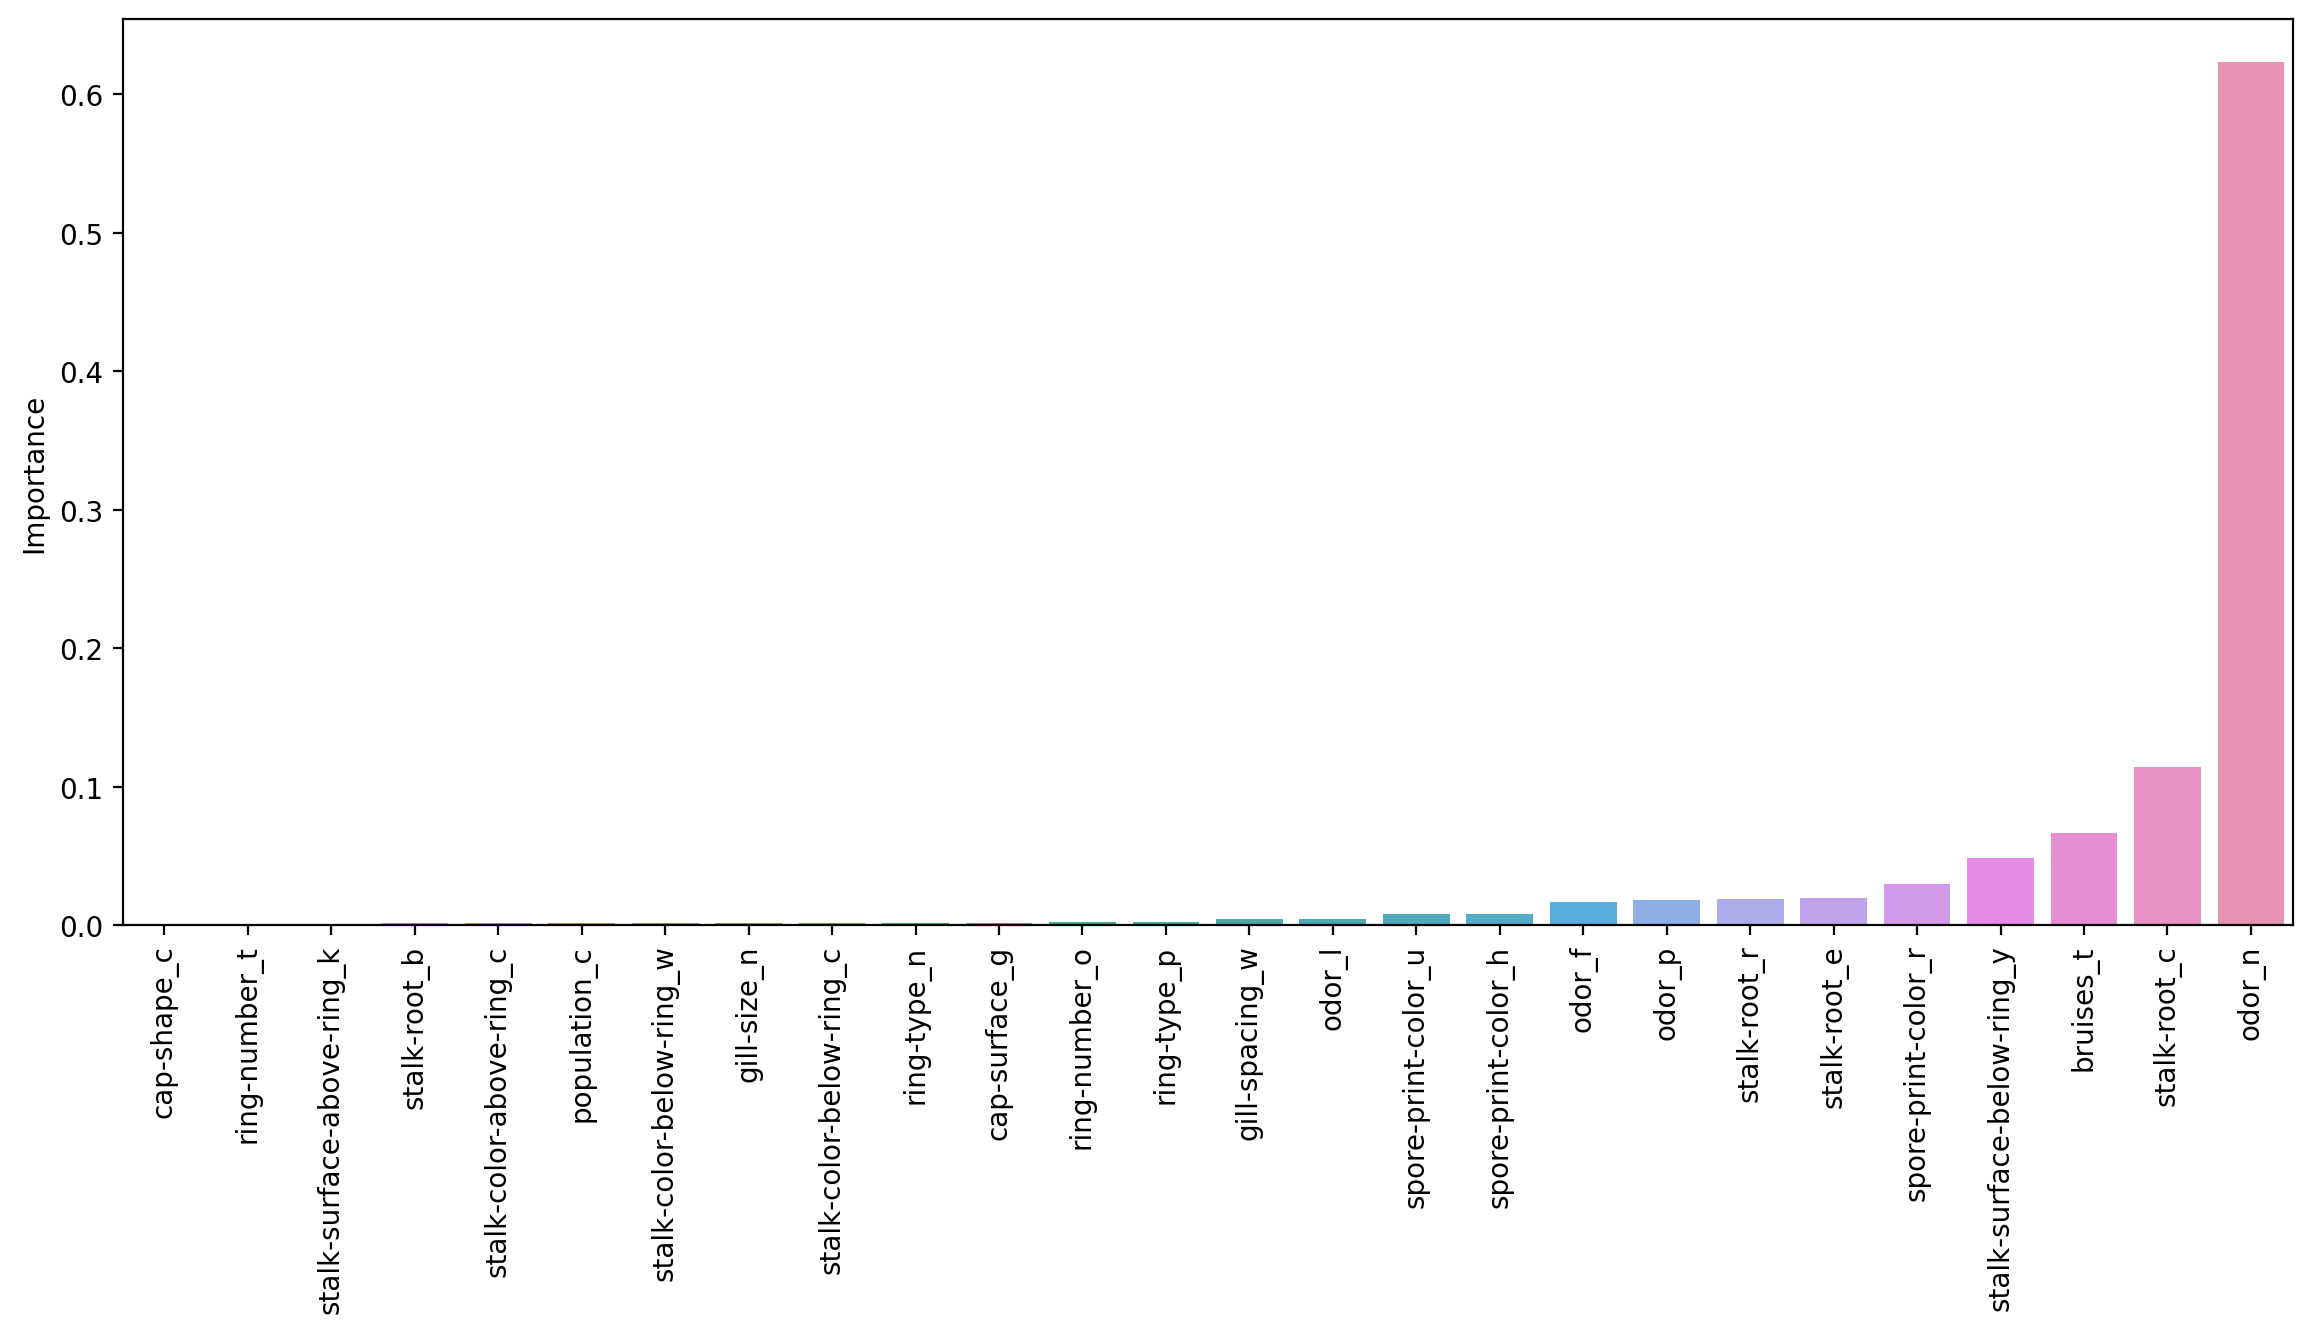

In [43]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);